In [1]:
import numpy as np
import random
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from model import NeuralNet
from trainer import Trainer
from optimizer import SGD, SGDWithMomentum, Adagrad, RMSProp, Adam

In [2]:
seed=1234
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

np.random.seed(seed)

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
trainset = datasets.MNIST(root='.data', train=True, download=True)

def get_mean_std(train_data):
    x = np.concatenate([np.asarray(train_data[i][0]) for i in range(len(train_data))])
    train_mean = np.mean(x, axis=(0, 1))/255.0
    train_std = np.std(x, axis=(0, 1))/255.0
    return train_mean, train_std

mean, std = get_mean_std(trainset)
mean, std

(0.1306604762738429, 0.30810780385646264)

In [4]:
train_transforms = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((mean,), (std,))])

train_data = datasets.MNIST(root = '.data', 
                            train = True, 
                            download = True, 
                            transform = train_transforms)

In [5]:
batch_size = 256

train_iterator = data.DataLoader(train_data, 
                                 shuffle = True, 
                                 batch_size = batch_size)

In [6]:
input_dim = 28 * 28
hid_dim = 512, 256
output_dim = 10

model = NeuralNet(input_dim, hid_dim, output_dim)

In [7]:
criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

#Optimizers
optimizer_sgd = SGD(model.parameters())
optimizer_sgdm = SGDWithMomentum(model.parameters())
optimizer_adagrad = Adagrad(model.parameters())
optimizer_rmsprop = RMSProp(model.parameters())
optimizer_adam = Adam(model.parameters())

In [8]:
trainer = Trainer(train_iterator, model, optimizer_sgd, criterion)
trainer.analyze_optimizers(optimizers=[optimizer_sgd, optimizer_sgdm, optimizer_adagrad, optimizer_rmsprop, optimizer_adam])

Adam(epoch:4): 100%|██████████| 235/235 [00:10<00:00, 22.43batch/s, loss=0.0275] 


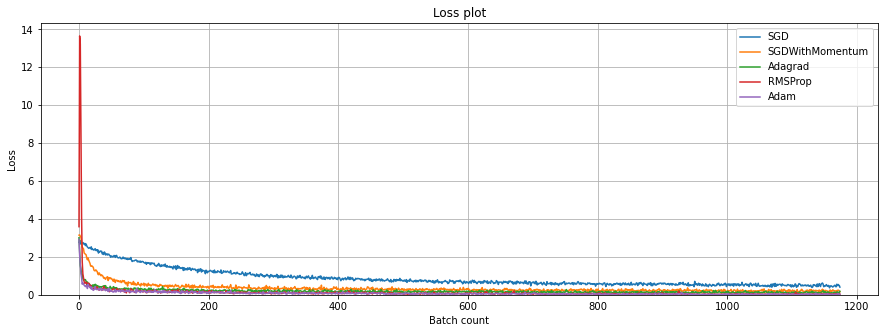

In [9]:
trainer.plot_loss()